我們認真的來做一下數據分析! 基本上我們從迴歸、機器學習, 到深度學習, 都是要學一個函數。過程從現在到未來都是:

![函數學習](images/function_learning.png)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 06-01 線性迴歸

#### 做一條直線

我們來一條線, 比如說

$$f(x) = 1.2x + 0.8$$

準備好個 50 個點

In [2]:
x = np.linspace(0,5,50)

In [3]:
y=1.2*x+0.8

畫出圖形來。

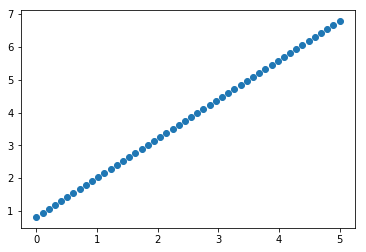

In [4]:
plt.scatter(x,y)

#### 加入 noise 項, 看來更真實

大概的想法就是, 我們真實世界的問題, 化成函數, 我們假設背後有個美好的函數。但相信我們很少看到真實世界的資料那麼漂亮。在統計上, 我們就是假設

$$f(x) + \varepsilon(x)$$

也就是都有個 noise 項。

In [5]:
y=1.2*x+0.8 + 0.5*np.random.randn(50)

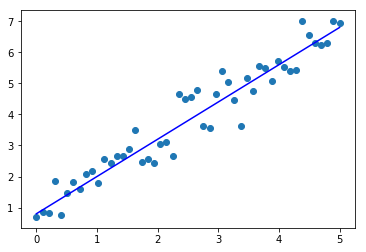

In [6]:
plt.scatter(x,y)
plt.plot(x,1.2*x+0.8,'b')#把正確答案畫出來(因為我們預先知道)

#### 做線性迴歸找出那條線

做線性迴歸有很多套件, 但我們這裡用 `sklearn` 裡的 `LinearRegression` 來做, 嗯, 線性迴歸。

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
regr = LinearRegression() 

#F(x)=wx+b，給一堆X和Y最後求出一個最適合的F(x) Loss function:.....
#for linear regression , using derivative to get the local optima

這裡要注意我們本來的 x 是

$$[x_1, x_2, \ldots, x_{50}]$$

但現在要的是

$$[[x_1], [x_2], \ldots, [x_{50}]]$$

這樣的。

In [9]:
x #python比較喜歡一列一列表示，而非都在同一行(50*1 matrix vs 1*50 matrix)

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

In [12]:
X = x.reshape(len(x),1)

In [13]:
regr.fit(X,y) #用regr這個model 去fit 我們的training set找出最好的w和b(過程稱之為training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
Y=regr.predict(X)

In [15]:
regr.predict([[1.3]])

array([2.41744298])

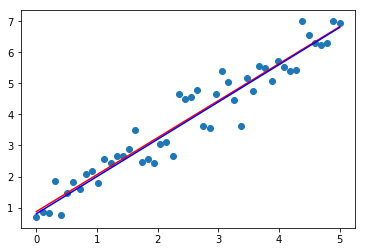

In [16]:
plt.scatter(x,y)
plt.plot(x,Y,'r') #我們求出的函數
plt.plot(x,1.2*x+0.8,'b') #godness function(usually,we dont know this,but we already know it here , so we can plot it)

## 06-02 標準函數訓練及測試

#### 分訓練資料、測試資料

一般我們想要看算出來的逼近函數在預測上是不是可靠, 會把一些資料留給「測試」, 就是不讓電腦在計算時「看到」這些測試資料。等函數學成了以後, 再來測試準不準確。這是我們可以用

    sklearn.cross_validation
    
裡的

    train_test_split
    
來亂數選一定百分比的資料來用。

In [17]:
x = np.linspace(0,5,200)
y =1.2*x+0.8+np.random.randn(200)

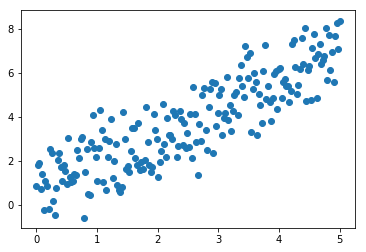

In [18]:
plt.scatter(x,y)

### **把原來的 `x`, `y` 中的 70% 給 training data, 30% 給 testing data。**

In [19]:
from sklearn.model_selection import train_test_split #把training data 與test data隨機切開

我們在「訓練」這個函數時只有以下這些資料。

In [24]:
X = x.reshape(len(x),1)#remember Ang.Ng=>X represent vector , a list of dataset. x represent a data

In [51]:
x_train,x_test,y_train,y_test =train_test_split( X , y ,test_size = 0.3, random_state = 4)
#random_state = ? : 我們可能會反覆測試同一個 dataset ,所以希望每次切出來都一樣，所以給random一個seed

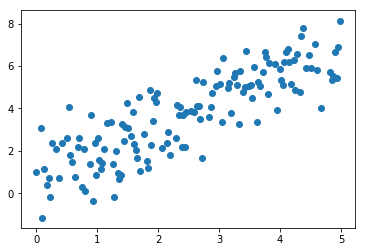

In [53]:
plt.scatter(x_train,y_train)

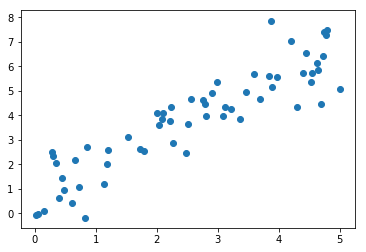

In [54]:
plt.scatter(x_test,y_test)

In [55]:
regr = LinearRegression()

NameError: name 'x_test' is not defined

#### 用訓練資料來 fit 函數

記得現在我們只用 70% 的資料去訓練。

In [56]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
Y_pred = regr.predict(x_test)

#### 用測試資料試試我們預測準不準

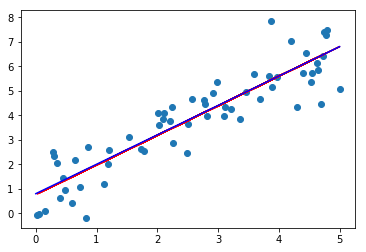

In [58]:
plt.scatter(x_test,y_test)
plt.plot(x_test,Y_pred,'r')
plt.plot(x,1.2*x+0.8,'b')

In [ ]:
# f(x)= W2* x^2 + W1* x + b also can use linear regression to fit it .We can apply x^2 to Y ,and we get  f(x)= W2* Y + W1* x + b,
# which is linear euation that we are familier with.
# Also,f(x)= W2* g1(x) + W1* g2(x) + b can use linear regressio model to fit it.

## 06-03 不是線性的目標函數

這裡我們用個非線性的函數來生假數據:

$$f(x) = \sin(3.2x) + 0.8x$$

一樣準備加上一些 noise。

### 生成假資料

#### 標準線性學

果然超級不準, 該如何是好?

#### 多項式

我們來用 6 次多項式學

#### 用 RBF!!

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

#### 三種一起比較